<a href="https://colab.research.google.com/github/driveframe/machinelearningprojectpractice/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

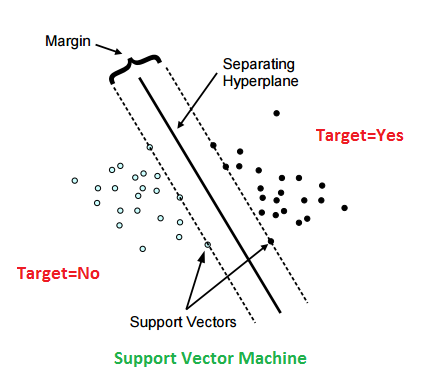

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/pravincoder/Machine-Learning-Models-Tutorial/refs/heads/main/golf_players.csv

--2024-12-30 15:08:03--  https://raw.githubusercontent.com/pravincoder/Machine-Learning-Models-Tutorial/refs/heads/main/golf_players.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129988 (127K) [text/plain]
Saving to: ‘golf_players.csv’

golf_players.csv    100%[===================>] 126.94K  --.-KB/s    in 0.03s   

2024-12-30 15:08:03 (4.95 MB/s) - ‘golf_players.csv’ saved [129988/129988]



In [ ]:
data = pd.read_csv("golf_players.csv")



## Support Vector Machines intuition


Now, we should be familiar with some SVM terminology.

**Hyperplane**

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

**Support Vectors**

Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

**Margin**

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.

**Margin in SVM**


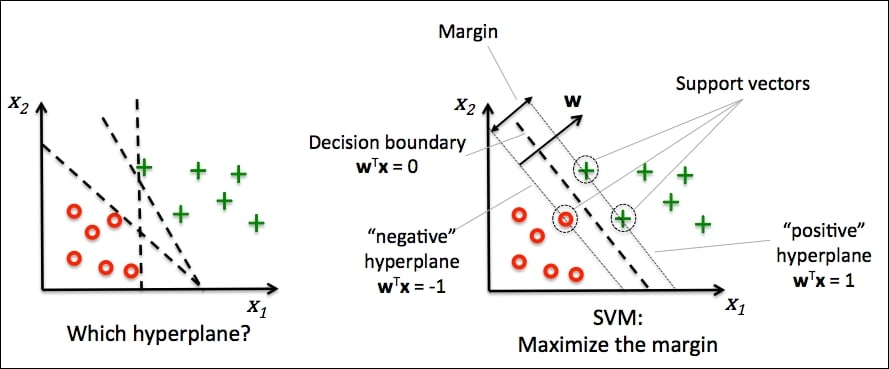

In [ ]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,176.000000,803.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,80.042945,61.390460,2015.888548,291.641207,65.715317,29.099223,58.557290,70.909767,1.227273,3.013699,0.031025,0.174463,0.044044,0.073802,0.026098
std,14.490395,5.138381,1.528592,9.275885,2.776523,0.500043,3.250965,0.698867,0.599567,1.999641,0.334259,0.683415,0.384139,0.374330,0.220139
min,49.000000,43.020000,2013.000000,269.700000,53.540000,27.510000,44.010000,68.698000,1.000000,1.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000
25%,70.000000,57.740000,2015.000000,285.450000,63.832500,28.760000,56.490000,70.511000,1.000000,1.000000,-0.170750,-0.222500,-0.168000,-0.165750,-0.115250
50%,81.000000,61.255000,2016.000000,291.500000,65.770000,29.090000,58.705000,70.896500,1.000000,3.000000,0.042500,0.165000,0.056500,0.090500,0.026000
75%,91.000000,65.027500,2017.000000,297.700000,67.647500,29.430000,60.767500,71.325750,1.000000,4.000000,0.256000,0.571250,0.301750,0.320250,0.179000
max,120.000000,76.880000,2018.000000,319.700000,73.520000,30.850000,69.330000,74.400000,4.000000,14.000000,1.130000,2.372000,1.367000,1.491000,0.660000


In [ ]:
data.info()

NameError: name 'data' is not defined

# Support Vector Regression

## Info about weird columns (Predicting Avg score)

**GIR** :-GIR stands for "greens in regulation" and is a golf statistic that refers to the number of strokes it takes for a golfer to reach the green:

**FAIRWAY PERCENTAGE** :-in golf is the percentage of times a golfer hits the fairway with their drive during a round.

**AVG SCRAMBLING** :- Scrambling is a binary statistic that measures whether a player's score is par or better, and if they are able to "up and down". A strong scrambling game can help improve scores and build resilience, especially when a player's long game is off.

**Strokes Gained Off The Tee (SG:OTT)**: measures how many strokes a player gained or lost on the field off the tee on Par 4s and Par 5s.

**STROKES GAINED AROUND THE GREENS (SG:ARG)**: Measures how many strokes a player gained or lost on any shot within 30 yards of the green.










In [ ]:
# Data preprocessing
# Replace commas in numeric columns and convert Money to float
data['Money'] = data['Money'].str.replace('[\$,]', '', regex=True).astype(float)
data['Points'] = data['Points'].str.replace(',', '', regex=True).astype(float)
data.head(10)

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
5,Brian Gay,103.0,71.37,2018,282.9,64.52,28.25,63.26,70.280,880.0,NaN,6.0,0.442,0.565,-0.166,0.036,0.253,2152501.0
6,Kyle Stanley,93.0,71.29,2018,295.7,71.09,29.89,54.80,70.404,1198.0,NaN,5.0,0.037,0.686,0.378,0.298,-0.027,3916001.0
7,Emiliano Grillo,94.0,70.16,2018,295.2,68.84,29.04,61.05,70.152,901.0,NaN,5.0,0.546,1.133,0.364,0.345,-0.122,2493163.0
8,Russell Henley,77.0,70.03,2018,293.0,68.77,29.80,54.33,70.489,569.0,NaN,3.0,0.167,0.541,0.093,0.467,-0.186,1516438.0
9,Jim Furyk,50.0,69.91,2018,280.5,63.19,28.73,62.58,70.342,291.0,NaN,2.0,0.389,0.412,-0.392,0.179,0.235,660010.0


In [ ]:
# Drop rows with significant missing values
data = data.dropna()
data = data.drop('Player Name',axis=1)
data.head()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
1,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
16,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,1.0,3.0,0.392,1.112,0.538,0.352,-0.169,4315200.0
22,87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,1.0,1.0,0.074,-0.094,-0.074,-0.200,0.105,1976198.0
23,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,1.0,3.0,0.315,0.569,0.120,-0.045,0.179,2448920.0
27,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,1.0,4.0,0.223,0.850,0.141,0.435,0.051,2714450.0


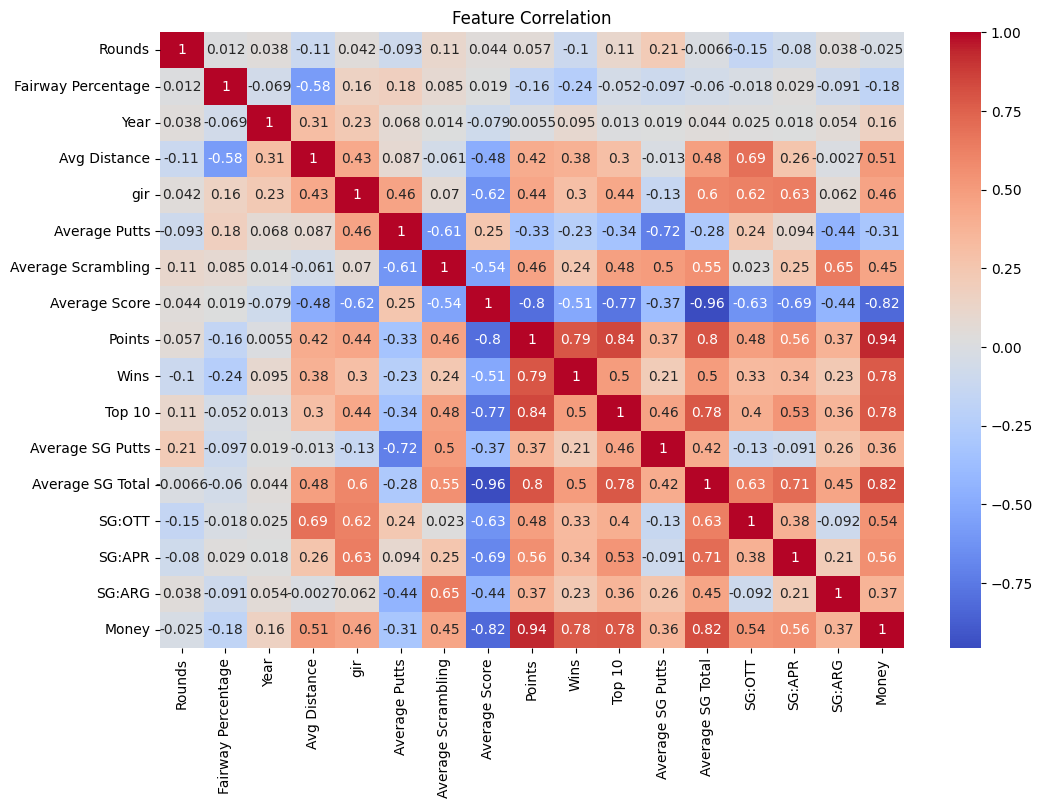

In [ ]:
# Exploratory Data Analysis
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

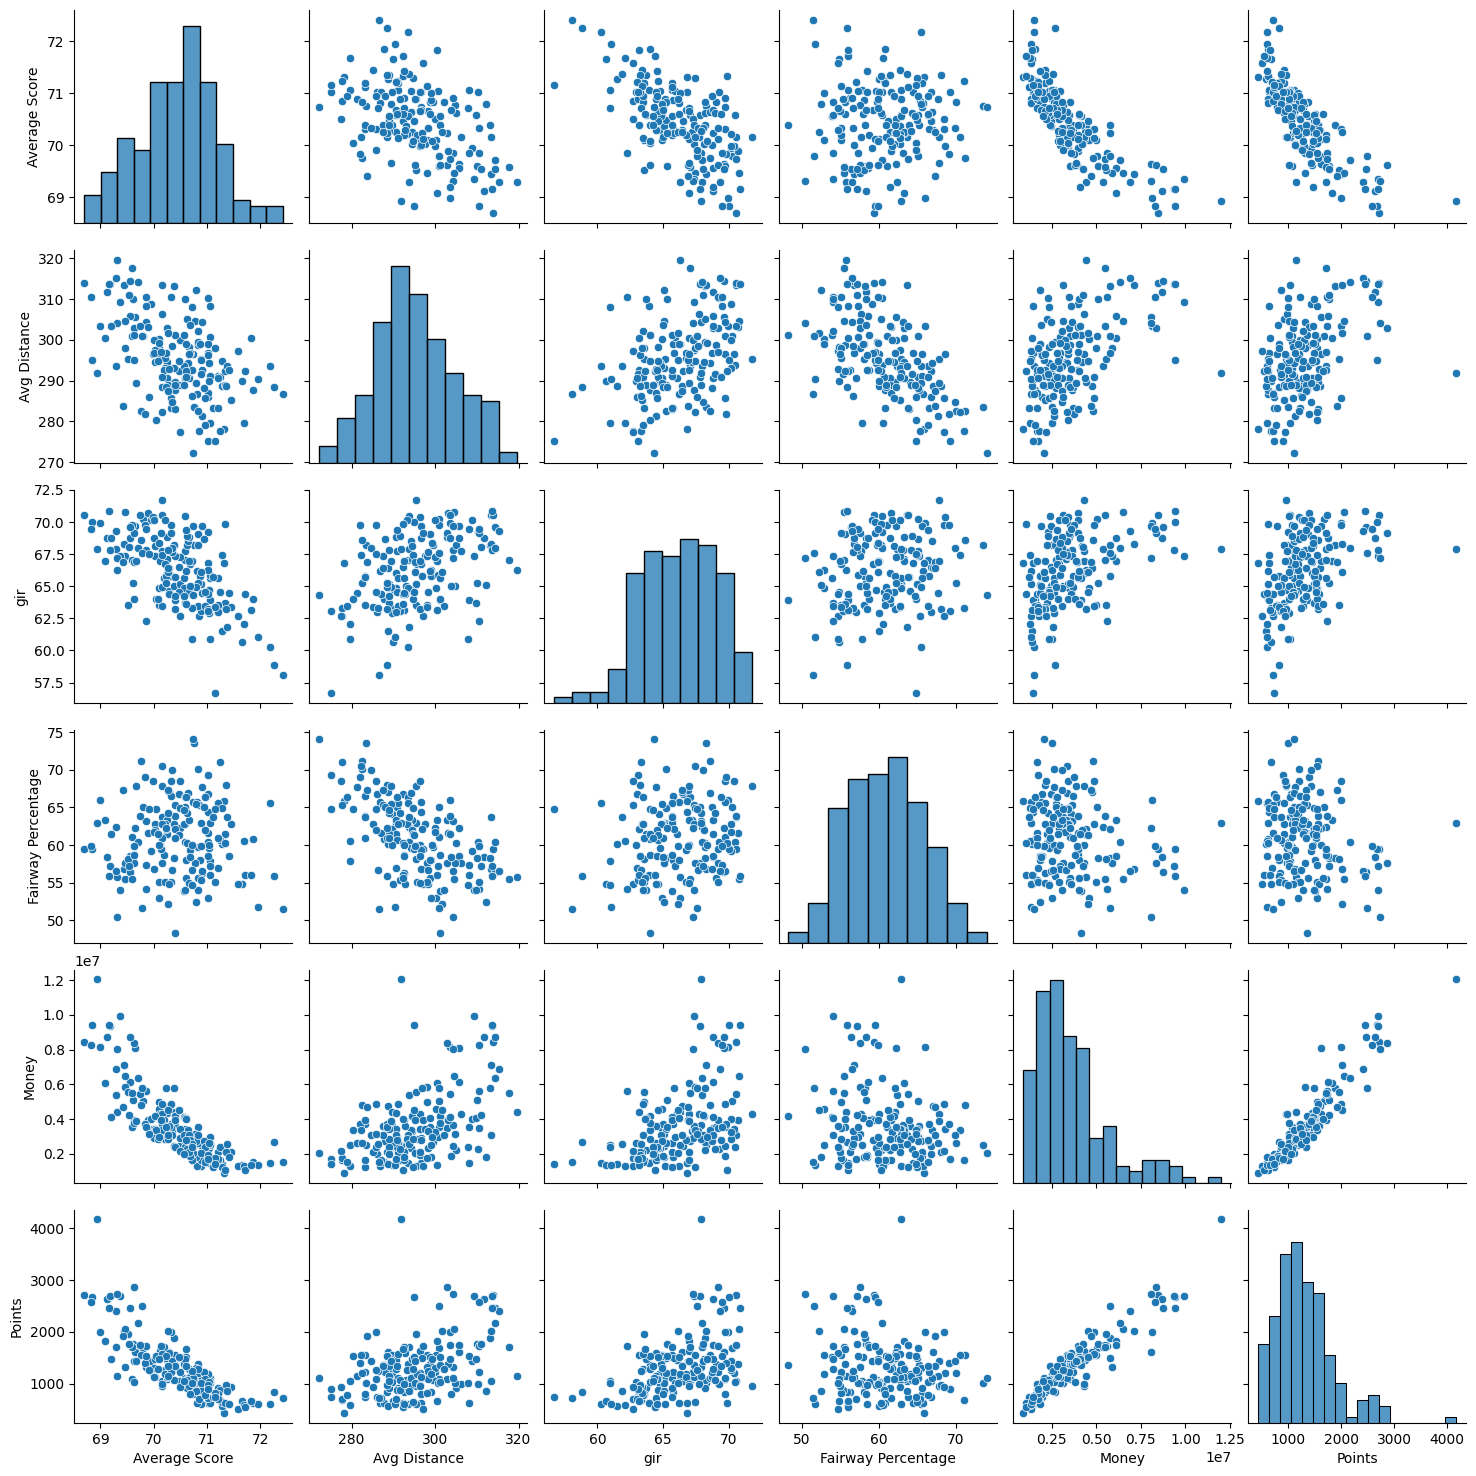

In [ ]:
sns.pairplot(data[['Average Score', 'Avg Distance', 'gir', 'Fairway Percentage','Money','Points']])


In [ ]:
# Prepare features and target variable
X = data[['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling']]
y = data['Average Score']

# if a player has'nt won the value is specified as nan

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train.head()

,Average Score
886,71.422
760,70.344
557,70.797
888,71.021
250,70.259


In [ ]:
# Train the SVM model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Mean Squared Error: 0.20
R^2 Score: 0.58


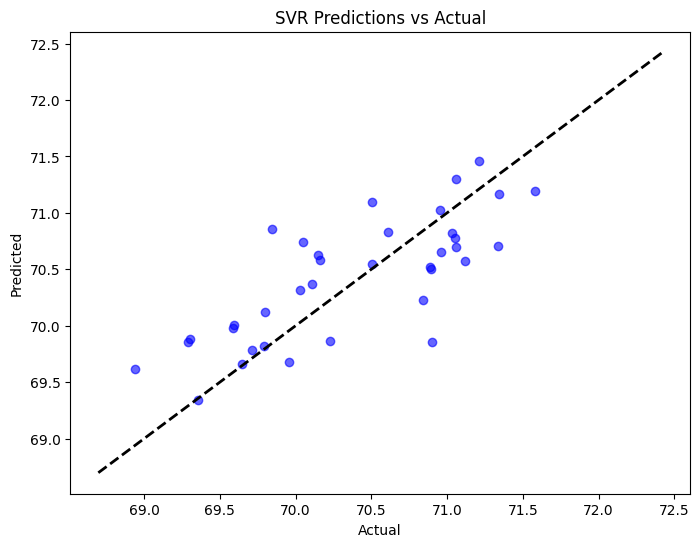

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualization of predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Predictions vs Actual')
plt.show()

# Support Vector Machines

For classification we need to change the Metric of Evaluation and Model

Our Goal will be to predict the Win is Greater then 0 or not
for , `win > 0` the model **Output 1** &
for `win == 0` model **Output 0**


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report

In [ ]:
# Reading data again
data = pd.read_csv('golf_players.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'golf_players.csv'

In [ ]:
# Replace NaN value of Win with 0
data['Wins'] = data['Wins'].fillna(0)

In [ ]:

# Create a binary target: Did the player win any tournaments? (1 = Yes, 0 = No)
data['Win_Binary'] = (data['Wins'] > 0).astype(int)

In [ ]:
# Features and target
X = data[['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling']]
y = data['Win_Binary']

y.head()

,Win_Binary
0,0
1,1
2,0
3,0
4,0


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)
print("Unique classes in y_train:", np.unique(y_train))

Unique classes in y_train: [0 1]


In [ ]:
# Train the SVM model
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       161
           1       0.67      0.06      0.11        35

    accuracy                           0.83       196
   macro avg       0.75      0.53      0.50       196
weighted avg       0.80      0.83      0.76       196



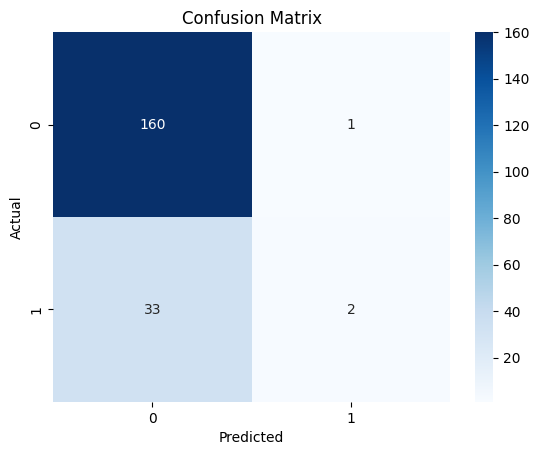

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Parameter efficent tuning model to solve data imbalance

we can see the confusion matrix class 0 has 160 values sample and 1 has only 35 sample only . So the model is assuming most sample as 0 yet getting decent scores.


In [ ]:
# we can see the confusion matrix class 0 has 160 values sample and 1 has only 35
model2 = SVC(kernel='rbf', C=1.0, class_weight='balanced')
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       161
           1       0.35      0.57      0.43        35

    accuracy                           0.73       196
   macro avg       0.62      0.67      0.63       196
weighted avg       0.80      0.73      0.76       196



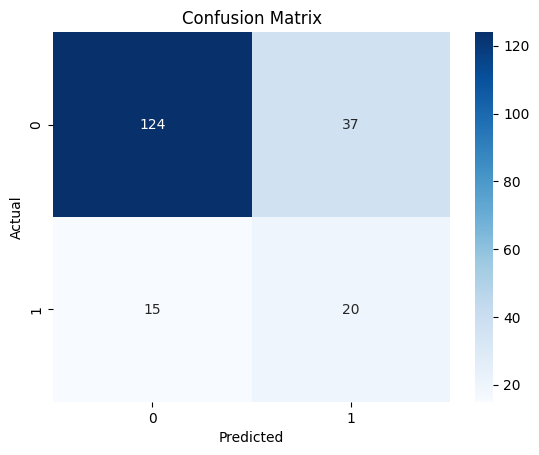

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

In [ ]:
# we can see the confusion matrix class 0 has 160 values sample and 1 has only 35
model3 = SVC(kernel='rbf',gamma=0.1, C=0.1, class_weight='balanced')
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       161
           1       0.47      0.54      0.51        35

    accuracy                           0.81       196
   macro avg       0.69      0.71      0.69       196
weighted avg       0.82      0.81      0.82       196



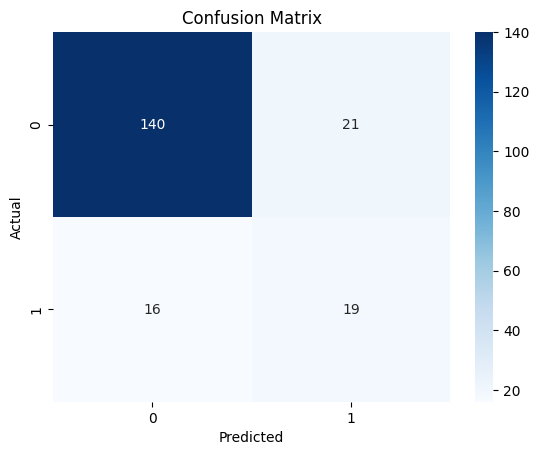

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()